### Check Data and PreProcessing

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

diagnosis 열은 문자값을 가지고 있으며 Unnarmed:32 열은 NaN 값을 가진다.

In [9]:
data = pd.read_csv('./data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
data = data.drop('id', axis=1)

In [12]:
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]

In [13]:
data = data.fillna(value=0)
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

### Compare PCA and t-SNE

In [14]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 

In [21]:
# Turn dataframe into arrays
X = data.values

# rank 2개 
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.003s...
[t-SNE] Computed neighbors for 569 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.593773
[t-SNE] KL divergence after 2000 iterations: 0.216177


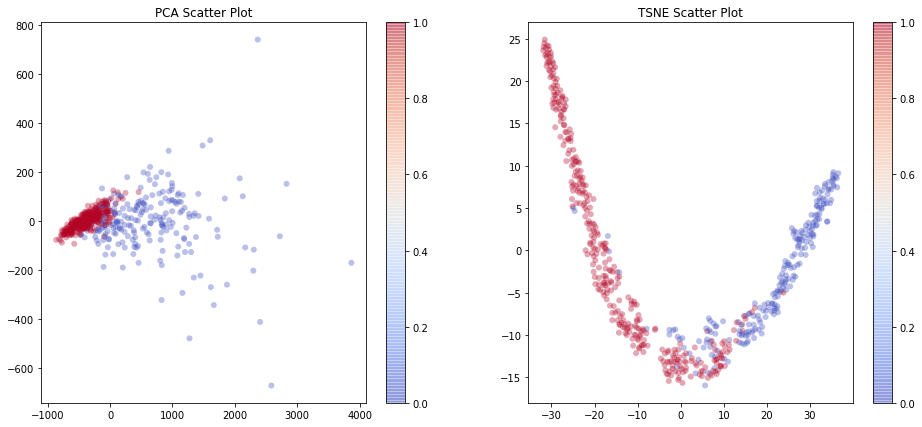

In [27]:
plt.figure(figsize = (16,7))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

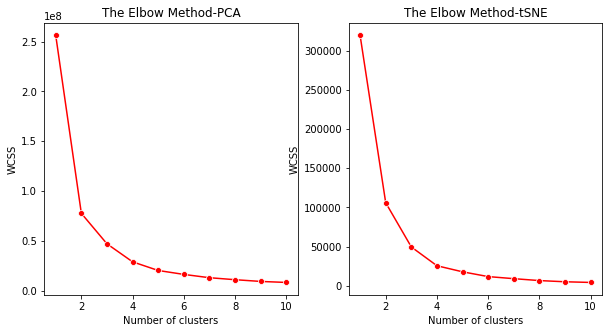

In [60]:
from sklearn.cluster import KMeans
wcss_pca = []
wcss_tsne =[]
for i in range(1, 11):
    kmeans_p = KMeans(n_clusters =i, init ='k-means++', random_state = 42)
    kmeans_p.fit(pca_2d)
    wcss_pca.append(kmeans_p.inertia_)
    
    kmeans_t = KMeans(n_clusters =i, init ='k-means++', random_state = 42)
    kmeans_t.fit(tsne_results)
    wcss_tsne.append(kmeans_t.inertia_)

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.lineplot(range(1,11), wcss_pca, marker='o', color='red')
plt.title('The Elbow Method-PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.subplot(122)
sns.lineplot(range(1,11), wcss_tsne, marker='o', color='red')
plt.title('The Elbow Method-tSNE')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

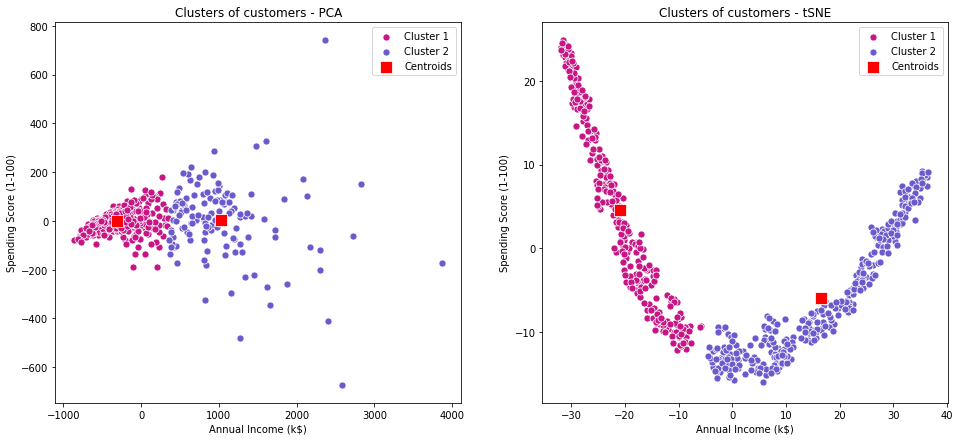

In [58]:
kmeans_p = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_pca = kmeans_p.fit_predict(pca_2d)

kmeans_t = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_tsne = kmeans_t.fit_predict(tsne_results)

plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(pca_2d[y_kmeans_pca == 0, 0], pca_2d[y_kmeans_pca == 0, 1],\
                color= 'mediumvioletred', label = 'Cluster 1', s = 50)
sns.scatterplot(pca_2d[y_kmeans_pca == 1, 0], pca_2d[y_kmeans_pca == 1, 1],\
                color = 'slateblue', label = 'Cluster 2', s = 50)
sns.scatterplot(kmeans_p.cluster_centers_[:,0], kmeans_p.cluster_centers_[:,1], \
               color= 'red', label = 'Centroids', s = 130, marker=',')
plt.grid(False)
plt.title('Clusters of customers - PCA')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.subplot(122)
sns.scatterplot(tsne_results[y_kmeans_tsne == 0, 0], tsne_results[y_kmeans_tsne == 0, 1], \
                color= 'mediumvioletred', label = 'Cluster 1', s = 50)
sns.scatterplot(tsne_results[y_kmeans_tsne == 1, 0], tsne_results[y_kmeans_tsne == 1, 1], \
                color = 'slateblue', label = 'Cluster 2', s = 50)
sns.scatterplot(kmeans_t.cluster_centers_[:,0], kmeans_t.cluster_centers_[:,1], \
               color= 'red', label = 'Centroids', s = 130, marker=',')
plt.grid(False)
plt.title('Clusters of customers - tSNE')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

### Compare PCA and t-SNE after Standardization 

In [43]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [44]:
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.003s...
[t-SNE] Computed neighbors for 569 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.321320
[t-SNE] KL divergence after 1800 iterations: 0.893365


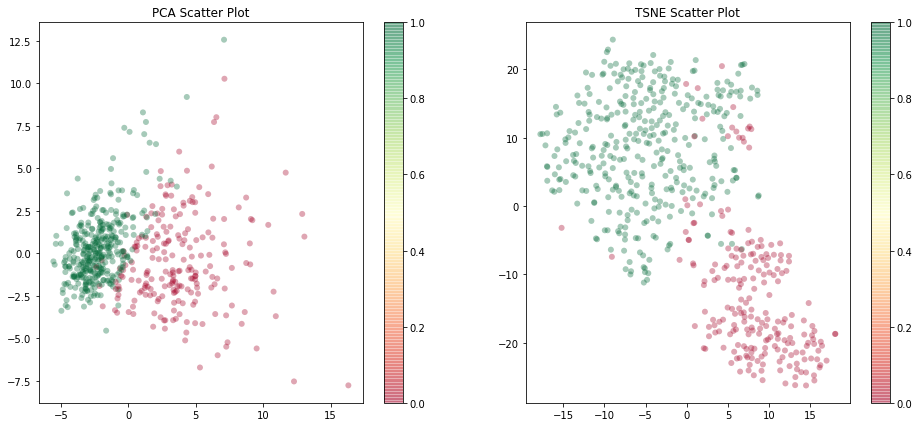

In [45]:
plt.figure(figsize = (16,7))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

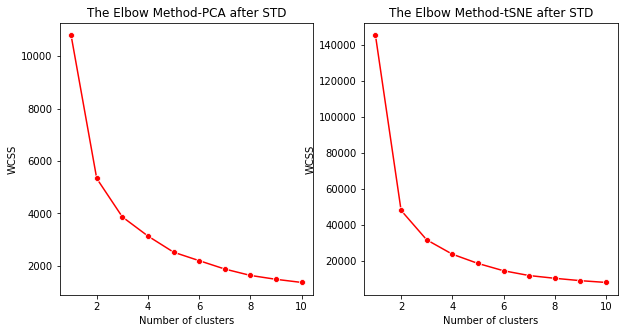

In [61]:
from sklearn.cluster import KMeans
wcss_pca_std = []
wcss_tsne_std =[]
for i in range(1, 11):
    kmeans_p = KMeans(n_clusters =i, init ='k-means++', random_state = 42)
    kmeans_p.fit(pca_2d_std)
    wcss_pca_std.append(kmeans_p.inertia_)
    
    kmeans_t = KMeans(n_clusters =i, init ='k-means++', random_state = 42)
    kmeans_t.fit(tsne_results_std)
    wcss_tsne_std.append(kmeans_t.inertia_)

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.lineplot(range(1,11), wcss_pca_std, marker='o', color='red')
plt.title('The Elbow Method-PCA after STD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.subplot(122)
sns.lineplot(range(1,11), wcss_tsne_std, marker='o', color='red')
plt.title('The Elbow Method-tSNE after STD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

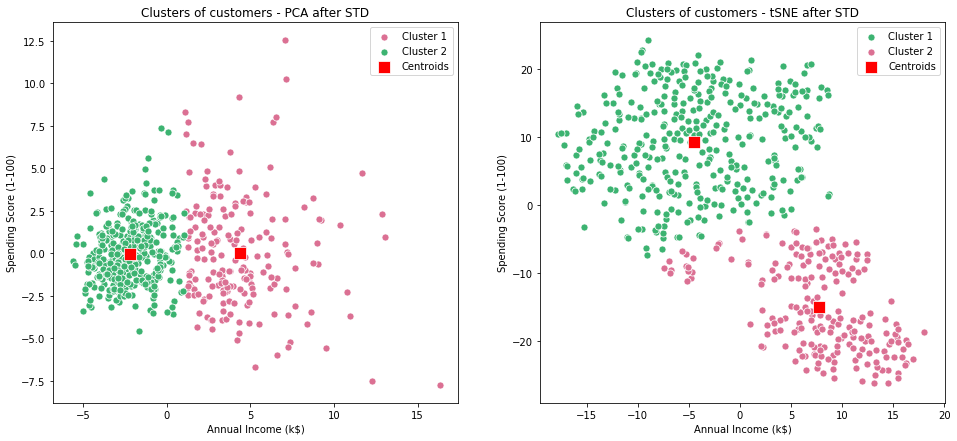

In [59]:
kmeans_p = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_pca_std = kmeans_p.fit_predict(pca_2d_std)

kmeans_t = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_tsne_std = kmeans_t.fit_predict(tsne_results_std)

plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(pca_2d_std[y_kmeans_pca_std == 0, 0], \
                pca_2d_std[y_kmeans_pca_std == 0, 1], color= 'palevioletred', \
               label = 'Cluster 1', s = 50)
sns.scatterplot(pca_2d_std[y_kmeans_pca_std == 1, 0],\
                pca_2d_std[y_kmeans_pca_std == 1, 1], color = 'mediumseagreen', \
               label = 'Cluster 2', s = 50)
sns.scatterplot(kmeans_p.cluster_centers_[:,0], kmeans_p.cluster_centers_[:,1], \
               color= 'red', label = 'Centroids', s = 130, marker=',')
plt.grid(False)
plt.title('Clusters of customers - PCA after STD')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.subplot(122)
sns.scatterplot(tsne_results_std[y_kmeans_tsne_std == 0, 0], \
                tsne_results_std[y_kmeans_tsne_std == 0, 1], \
                color= 'mediumseagreen', label = 'Cluster 1', s = 50)
sns.scatterplot(tsne_results_std[y_kmeans_tsne_std == 1, 0], \
                tsne_results_std[y_kmeans_tsne_std == 1, 1], \
                color = 'palevioletred', label = 'Cluster 2', s = 50)
sns.scatterplot(kmeans_t.cluster_centers_[:,0], kmeans_t.cluster_centers_[:,1], \
               color= 'red', label = 'Centroids', s = 130, marker=',')
plt.grid(False)
plt.title('Clusters of customers - tSNE after STD')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()